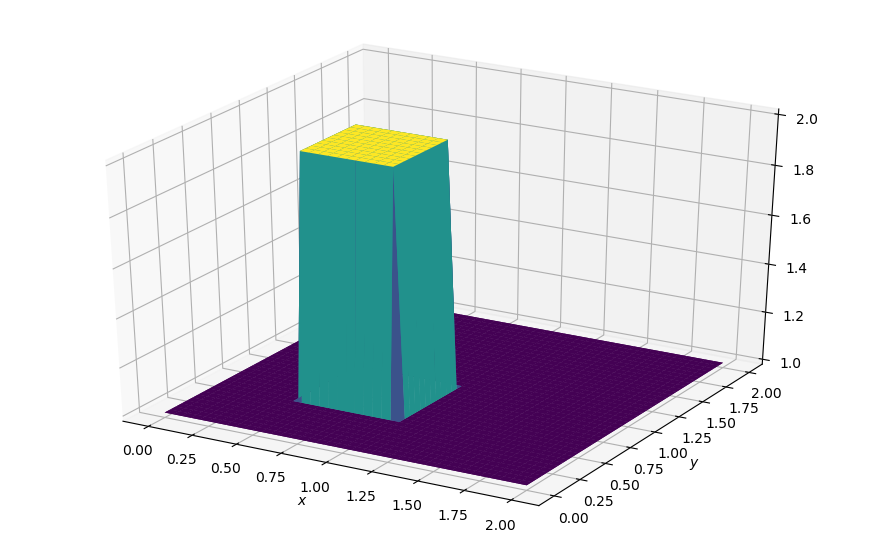

In [3]:
import numpy
from matplotlib import pyplot,cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

nx = 41
ny = 41
dx = 2 / (nx-1)
dy = 2 / (ny-1)
nt = 120
sigma = 0.0009
nu = 0.01
dt = dx * dy * sigma / nu
x = numpy.linspace(0,2,nx)
y = numpy.linspace(0,2,ny)

#initial condition

u = numpy.ones((ny,nx))
un = numpy.ones((ny,nx))

v = numpy.ones((ny,nx))
vn = numpy.ones((ny,nx))

u[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)] = 2
v[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)] = 2

#plot IC's

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [28]:
def burgers(nt):
    u = numpy.ones((ny,nx))
    un = numpy.ones((ny,nx))
    v = numpy.ones((ny,nx))
    vn = numpy.ones((ny,nx))
    u[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)] = 2
    v[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)] = 2
    for n in range (nt+1):
        un = u.copy()
        vn = v.copy()
        
        u[1:-1,1:-1] = un[1:-1,1:-1] - (dt/dx)*un[1:-1,1:-1]*(un[1:-1,1:-1]-un[1:-1,:-2]) - (dt/dy)*vn[1:-1,1:-1]*(un[1:-1,1:-1]-un[:-2,1:-1]) + (nu*dt/dx**2)*(un[1:-1,2:]-2*un[1:-1,1:-1]+vn[1:-1,:-2]) + (nu*dt/dy**2)*(un[2:,1:-1]-2*un[1:-1,1:-1]+vn[:-2,1:-1])
        v[1:-1,1:-1] = vn[1:-1,1:-1] - (dt/dx)*un[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[1:-1,:-2]) - (dt/dy)*vn[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[:-2,1:-1]) + (nu*dt/dx**2)*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,:-2]) + (nu*dt/dy**2)*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[:-2,1:-1]) 
        
        u[0,:] = 1
        u[-1,:] = 1
        u[:,0] = 1
        u[:,-1] = 1
        
        v[0,:] = 1
        v[-1,:] = 1
        v[:,0] = 1
        v[:,-1] = 1

    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=1, cstride=1)
    ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=1, cstride=1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');
        
        

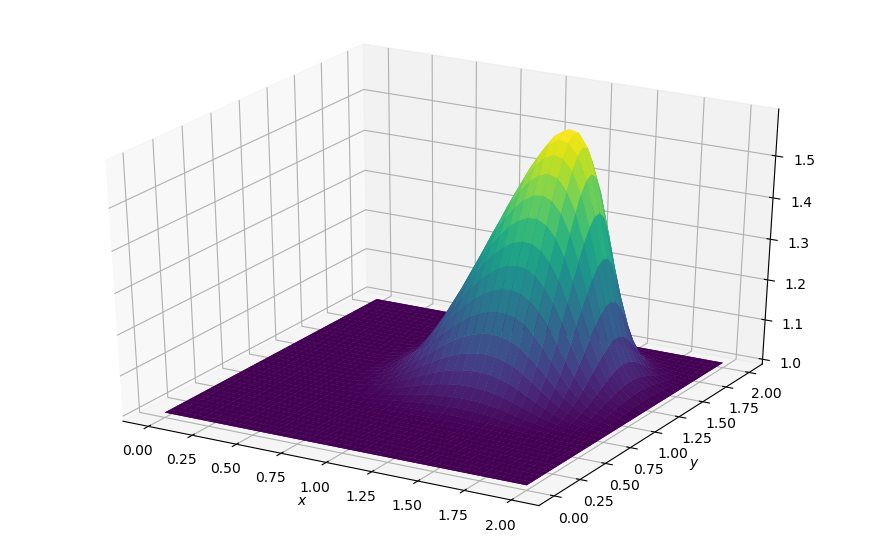

In [38]:
burgers(2000)